Trong phần trước, chúng ta đã xây dựng các mô hình phân loại hình ảnh 2 class với convolutional neural network (bạn có thể hiểu là mạng noron phức hợp nhưng những khái niệm này người viết sẽ không dịch sang tiếng Việt vì có thể nó không giải thích đầy đủ được ý nghĩa của nó). Các mô hình đạt hiệu suất khác nhau phụ thuộc vào số layer mà mô hình đó học được cũng như dữ liệu được đưa vào để train mô hình. Nhìn chung, với 2 class mô hình học khá tốt vì nó chỉ phân biệt hoặc cái này hoặc cái kia và những đặc trưng với sẽ dễ dàng phân biệt.

Tuy nhiên, nếu tập dữ liệu có nhiều class (VD: 10 class) thì rất có thể mô hình sẽ khó phân biệt đối tượng hơn vì tuy rằng mỗi class sẽ có những đặc trưng riêng, nhưng đôi khi chúng lại có một điểm nào đó tương đồng với nhau, điều đó sẽ khiến cho mô hình học khó phân biệt và nhận dạng đúng đối tượng đó là gì so với dữ liệu chỉ có 2 class. 

Trong phần này, chúng ta cũng sẽ xây dựng mô hình dựa trên kiến trúc của TinyVGG từ [CNN explainer](https://poloclub.github.io/cnn-explainer/) với 10 class thay vì 2 class như phần trước. 

Nội dụng của phần này gồm: 

1. Khai phá dữ liệu
2. Chuẩn bị dữ liệu ( đồng bộ cấu trúc dữ liệu theo đúng định dạng )
3. Khởi tạo mô hình
4. Fit mô hình
5. Đánh giá mô hình
6. Cải thiện mô hình
7. Lặp lại quá trình để mô hình tốt hơn


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)



## 1. Khai phá dữ liệu 

Trong phần này, chúng ta sẽ thực hiên các bước sau:

+ Tải xuống tập dữ liệu 
+ Tìm hiểu cấu trúc tổng thể 
+ Hiển thị tên của các class có trong tập dữ liệu 
+ Hiển thị  hình ảnh bất kỳ được lấy từ một số class ngẫu nhiên

In [1]:
!wget https://www.dropbox.com/s/xjyf4ug18zqvig0/10_food_classes.zip

--2021-09-07 16:04:05--  https://www.dropbox.com/s/xjyf4ug18zqvig0/10_food_classes.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xjyf4ug18zqvig0/10_food_classes.zip [following]
--2021-09-07 16:04:06--  https://www.dropbox.com/s/raw/xjyf4ug18zqvig0/10_food_classes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc59dc09d433322ff679192fc296.dl.dropboxusercontent.com/cd/0/inline/BVsYwkH9JhtCUtu-4zLezO4iVnpuEvIXuiZpasUqYCv3En8ts4dF1VWjQQ83HzOjnL-9GTU-uOqktdcMLWnYhQSIqnb0ELyIohNUtbdz8LU3JwHFFnweedGURGta3RIMYTxdiG-0TKV46h_DG_VeimkL/file# [following]
--2021-09-07 16:04:06--  https://uc59dc09d433322ff679192fc296.dl.dropboxusercontent.com/cd/0/inline/BVsYwkH9JhtCUtu-4zLezO4iVnpuEvIXuiZpasUqYCv3En8ts4dF1VWjQQ83HzOjnL-9G

In [2]:
import zipfile

def unzip_file(filepath) : 
  zipref = zipfile.ZipFile(filepath)
  zipref.extractall()
  zipref.close()
  print("Unziped file")
  

In [3]:
unzip_file("10_food_classes.zip")

Unziped file


In [4]:
import os 

In [5]:
def walk_through_directory(dirname) : 
  for pathname, dirnames, filenames in os.walk(dirname) : 
    print(f"Có {len(dirnames)} thư mục con và {len(filenames)} files trong thư mục {pathname}")

In [6]:
dirname = "10_food_classes"
walk_through_directory(dirname)

Có 2 thư mục con và 0 files trong thư mục 10_food_classes
Có 10 thư mục con và 0 files trong thư mục 10_food_classes/train
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/prime_rib
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/greek_salad
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/spaghetti_bolognese
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/filet_mignon
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/panna_cotta
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/bruschetta
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/garlic_bread
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/pulled_pork_sandwich
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/clam_chowder
Có 0 thư mục con và 750 files trong thư mục 10_food_classes/train/pad_thai
Có 10 thư mục con và 0 files trong thư mục 10_food_classes/test
Có 0 thư mục con và

Tạo đường dẫn đến 2 tập dữ liệu `train` và `test`

In [7]:
train_dir = "10_food_classes/train"
test_dir = "10_food_classes/test"

Lấy danh sách các label của tập dữ liệu `train`

In [8]:
import pathlib
pathdir = pathlib.Path(train_dir)
class_names = [item.name for item in pathdir.glob("*")]
num_classes = len(class_names)
print(f"Danh sách tên các class : {class_names}")
print(f"Có {num_classes} classes")

Danh sách tên các class : ['prime_rib', 'greek_salad', 'spaghetti_bolognese', 'filet_mignon', 'panna_cotta', 'bruschetta', 'garlic_bread', 'pulled_pork_sandwich', 'clam_chowder', 'pad_thai']
Có 10 classes


Lấy ngẫu nhiên một số hình ảnh từ một class ngẫu nhiên và hiển thị. Trước tiên, chúng ta sẽ viết một hàm để thực thi quá trình này. 

In [9]:
import matplotlib.pyplot as plt 
import random
import math

In [10]:
def get_random_images(target_dir, n_samples=1) : 
  target_class_names = random.sample(os.listdir(target_dir),k=n_samples)
  target_class_paths = [os.path.join(target_dir, class_name) for class_name in target_class_names]
  n_cols = 3 
  n_rows = math.ceil(n_samples / n_cols)
  plt.figure(figsize=(n_cols * 6, n_rows * 4))
  for i, class_path in enumerate(target_class_paths) :
    random_image_name = random.choice(os.listdir(class_path))
    random_image_path = os.path.join(class_path, random_image_name)
    image = plt.imread(random_image_path)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(image)
    plt.axis(False)
    plt.title(target_class_names[i])    


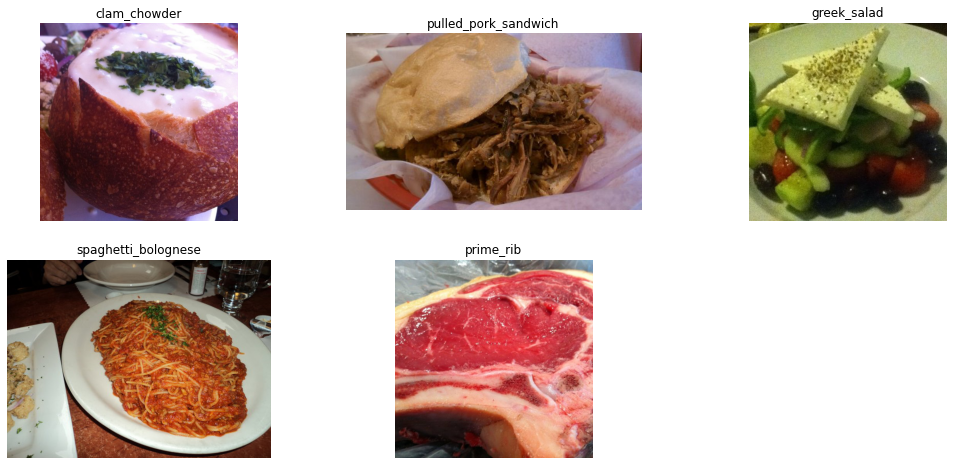

In [11]:
get_random_images(train_dir,5)

## Chuẩn bị dữ liệu 

Là quá trình load dữ liệu và đồng bộ tất cả về cùng một định dạng trước khi đưa vào mô hình train. Như trong phần trước, chúng ta sẽ sử dụng `ImageDataGenerator` để thực hiện bước này.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Với tập dữ liệu 2 class, chúng ta sử dụng `class_mode` là `binary`, nhưng khi có trên 2 class thì thay đổi thành `categorical`.

> Tại sao luôn đưa kích thước hình ảnh là (224,224)?  Thực ra, bạn có thể điều chỉnh kích thước tùy theo ý mình, nhưng 224x224 là một kích thước được sử dụng rất phổ biến dành cho quá trình chuẩn bị dữ liệu hình ảnh

## 3. Khởi tạo mô hình

### 3.1 Mô hình cơ sở model_1 

Mô hình cơ sở này sẽ giống với mô hình cơ sở được sử dụng cho vấn đề phân loại 2 class những có một số điều chình : 

+ Thay đổi output layer thành `10` (với 2 class là `1`)
+ Thay đổi activation function của output layer thành `softmax` (thay vì `sigmoid` cho 2 class) 
+ Thay đổi loss function khi compile thành `categorical_crossentropy` (thay vì `binary_crossentropy` cho 2 class)

In [15]:
from tensorflow.keras import Sequential, layers

In [16]:
tf.random.set_seed(42)

model_1 = Sequential([
                      layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
                      layers.Conv2D(10,3,activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(10,3,activation="relu"),
                      layers.Conv2D(10,3,activation="relu"),
                      layers.MaxPool2D(),
                      layers.Flatten(),
                      layers.Dense(num_classes, activation="softmax")
])

model_1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## 4. Fit mô hình 

In [18]:
model_1_history = model_1.fit(
    train_data,
    steps_per_epoch=len(train_data), 
    epochs=5, 
    validation_data=test_data, 
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 57s 233ms/step - loss: 2.0480 - accuracy: 0.2640 - val_loss: 1.7429 - val_accuracy: 0.3896
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.6231 - accuracy: 0.4520 - val_loss: 1.5554 - val_accuracy: 0.4616
Epoch 3/5
235/235 [==============================] - 55s 234ms/step - loss: 1.2469 - accuracy: 0.5884 - val_loss: 1.5787 - val_accuracy: 0.4356
Epoch 4/5
235/235 [==============================] - 55s 234ms/step - loss: 0.7235 - accuracy: 0.7681 - val_loss: 1.9446 - val_accuracy: 0.3944
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.3029 - accuracy: 0.9112 - val_loss: 2.6389 - val_accuracy: 0.3944


Mô hình với 10 class train lâu hơn mô hình 2 class rất nhiều. Đó là vì tập dữ liệu được đưa vào mô hình hiện tại có sô lượng hình ảnh lớn hơn rất nhiều. Với mô hình 2 class, có tất cả 2000 hình ảnh, với `train` là 1500 và `test` là `500` trong khi với mô hình 10 classes có tất cả 10000 hình, `train` mỗi class là 750, tổng 10 class là 7500, `test` mỗi class là 250, tổng 10 class là 2500. 

> Khi dữ liệu càng nhiều thì thời gian để mô hình train sẽ càng lâu.

## 5. Đánh giá mô hình 

In [19]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.6389 - accuracy: 0.3944


[2.6389076709747314, 0.3944000005722046]

Vẽ đường loss_curves để đánh giá quá trình train của mô hình qua mỗi epoch

In [20]:
def plot_loss_curves(history) :
  history = history.history 
  acc,val_acc = history["accuracy"], history["val_accuracy"]
  loss,val_loss = history["loss"], history["val_loss"]

  plt.figure(figsize=(16,6))
  plt.subplot(121)
  plt.plot(acc, label="train accuracy")
  plt.plot(val_acc, label="val accuracy")
  plt.title("Accuracy")
  plt.legend()

  plt.subplot(122)
  plt.plot(loss, label="train loss")
  plt.plot(val_loss, label="val loss")
  plt.title("Loss")
  plt.legend()

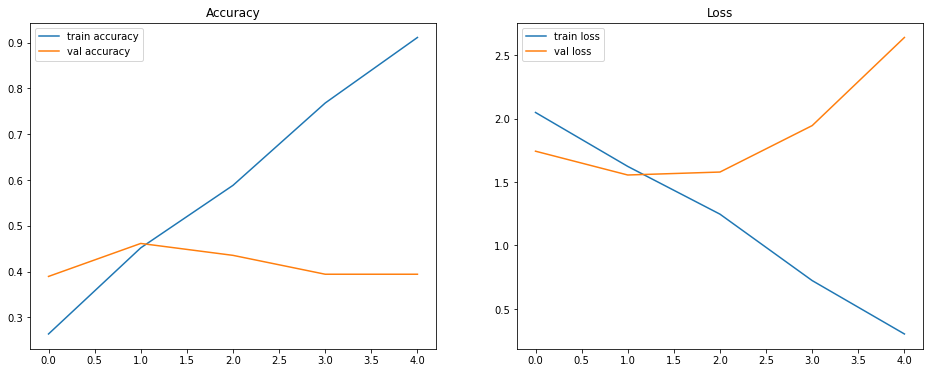

In [21]:
plot_loss_curves(model_1_history)

Qua biểu đồ có thể thấy : 
- Với biểu đồ  **Accuracy**, `Train accuracy` tăng rất nhiều trong khi `val_accuracy` lại không tăng, thậm chí còn bị giảm
- Với biểu đồ **Loss** `train_loss` giảm rất nhiều trong khi `val_loss` lại có chiều hướng tăng.

👉 Có thể thấy mô hình trong quá trình train học rất tốt nhưng khi đưa những dữ liệu chưa từng được học vào, nó hoạt động rất tệ. Điều  này chứng tỏ mô hình hiện tại đang bị `overfitting` 


## 6. Cải thiện mô hình

Như đã thấy ở mô hình trên đang gặp vấn đề về  `overfitting`. Để ngăn chặn việc học quá tốt nhưng kiểm tra quá tệ này của  mô hình chúng ta có thể thực hiện một số cách sau : 

+ Tăng cường thêm dữ liệu : Khi dữ liệu được đưa vào càng nhiều thì mô hình sẽ có thêm nhiều cơ hội để tìm kiếm các đặc tính riêng của dữ liệu đó
+ Làm cho mô hình Đơn giản lại: Đôi khi mô hình quá phức tạp sẽ khiến cho nó học các mẫu từ dữ liệu quá tốt và không có khả năng tổng quát hóa đối với những dữ liệu mà nó chưa từng thấy. Một cách để đơn giản hóa mô hình là giảm đi số lượng layer hoặc các units trong layers đó.
+ Sử dụng **data augmentation** : Biến đổi hình dạng của dữ liệu sẽ làm cho mô hình học kỹ hơn vì nó không còn đơn giản như hình gốc. Nếu một mô hình có thể học được các mẫu dữ data augmentation, mô hình đó có thể tổng quát hóa tốt hơn đối với dữ liệu mà nó chưa từng thấy. 
+ Sử dụng **transfer learning**: việc tái sử dụng mô hình đã được train trước đó là một trong những cách tốt để giúp cải thiên mô hình và tiết kiệm thời gian train mô hình. Trong trường hợp này, sử dụng mô hình thị giác máy tính để train lại trên tập dữ liệu lớn và sau đó điều chỉnh một chút để phù hợp hơn với loại dữ liệu mà ta đang sử dụng. 

### 6.1 Đơn giản hóa mô hình 

Chúng ta sẽ loại bỏ đi một số layer để mô hình trở nên đơn giản hơn

In [22]:
model_2 = Sequential([
                      layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),                      
                      layers.MaxPool2D(),
                      layers.Conv2D(10,3,activation="relu"),
                      layers.MaxPool2D(),
                      layers.Flatten(),
                      layers.Dense(num_classes, activation="softmax")
])

model_2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_2_history = model_2.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=5,
    validation_data=test_data, 
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 1.9779 - accuracy: 0.3143 - val_loss: 1.6614 - val_accuracy: 0.4208
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.4735 - accuracy: 0.5020 - val_loss: 1.4819 - val_accuracy: 0.4824
Epoch 3/5
235/235 [==============================] - 50s 214ms/step - loss: 1.1278 - accuracy: 0.6304 - val_loss: 1.6527 - val_accuracy: 0.4368
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.7117 - accuracy: 0.7767 - val_loss: 1.7475 - val_accuracy: 0.4372
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.3847 - accuracy: 0.8912 - val_loss: 2.1692 - val_accuracy: 0.4100


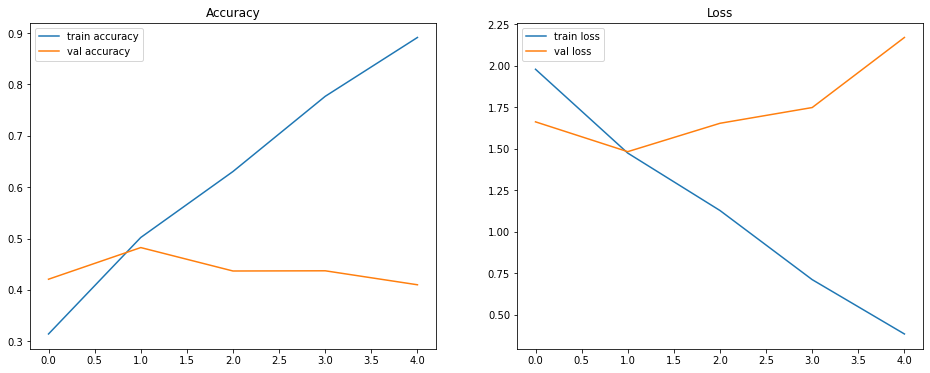

In [23]:
plot_loss_curves(model_2_history)

So với `model_1` thì `model_2` dù đã được giản hóa số layer những có vẻ như phương pháp này không hiệu quả để ngăn chặn `overfitting`. 

Tiếp theo, chúng ta sẽ sử dụng **data augmentation** 

In [24]:
train_datagen_augmentation = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [25]:
train_data_augmented = train_datagen_augmentation.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32, 
    class_mode="categorical",
    shuffle=True
)

Found 7500 images belonging to 10 classes.


Chúng ta sẽ clone lại kiến trúc của mô hình cơ sở (`model_1`) để compile và fit mô hình

In [26]:
# model 3 sẽ sử dụng cấu trúc tương tự như model_1
initial_epoch = 5 
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_3_history = model_3.fit(
    train_data_augmented, 
    steps_per_epoch=len(train_data_augmented),
    epochs=initial_epoch, 
    validation_data = test_data, 
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 123s 523ms/step - loss: 2.2490 - accuracy: 0.1727 - val_loss: 1.9919 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 120s 511ms/step - loss: 2.0394 - accuracy: 0.2863 - val_loss: 1.8941 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 120s 511ms/step - loss: 1.9728 - accuracy: 0.3167 - val_loss: 1.7776 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 119s 507ms/step - loss: 1.9337 - accuracy: 0.3340 - val_loss: 1.7723 - val_accuracy: 0.3868
Epoch 5/5
235/235 [==============================] - 119s 507ms/step - loss: 1.9062 - accuracy: 0.3359 - val_loss: 1.7074 - val_accuracy: 0.4096


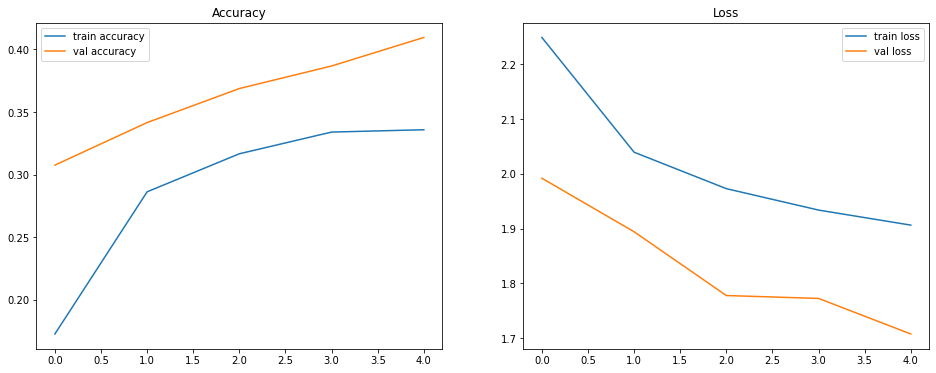

In [27]:
plot_loss_curves(model_3_history)

👍 Các đường `train` và `test` trong 2 biểu đồ đã gần như đi theo cùng một hướng. Mặc dù mô hình học không thực sự tốt với data augmentation nhung nó đã không còn tình tràng `overfitting` như 2 mô hình trước.

Mô hình mới chỉ train được qua 5 epochs, nếu train lâu hơn liệu khả năng học của mô hình này liệu có tốt hơn không? Chúng ta sẽ thử cho mô hình chạy thêm 5 epoch nữa


In [28]:
num_epochs = initial_epoch + 5 

model_3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_3_history = model_3.fit(
    train_data_augmented,
    steps_per_epoch=len(train_data_augmented),
    epochs=num_epochs, 
    initial_epoch=initial_epoch,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 6/10
235/235 [==============================] - 121s 513ms/step - loss: 1.8822 - accuracy: 0.3517 - val_loss: 1.6873 - val_accuracy: 0.4236
Epoch 7/10
235/235 [==============================] - 120s 510ms/step - loss: 1.8341 - accuracy: 0.3740 - val_loss: 1.7538 - val_accuracy: 0.3776
Epoch 8/10
235/235 [==============================] - 120s 509ms/step - loss: 1.8023 - accuracy: 0.3859 - val_loss: 1.6559 - val_accuracy: 0.4268
Epoch 9/10
235/235 [==============================] - 119s 505ms/step - loss: 1.7463 - accuracy: 0.4035 - val_loss: 1.5375 - val_accuracy: 0.4804
Epoch 10/10
235/235 [==============================] - 116s 494ms/step - loss: 1.6953 - accuracy: 0.4228 - val_loss: 1.5873 - val_accuracy: 0.4568


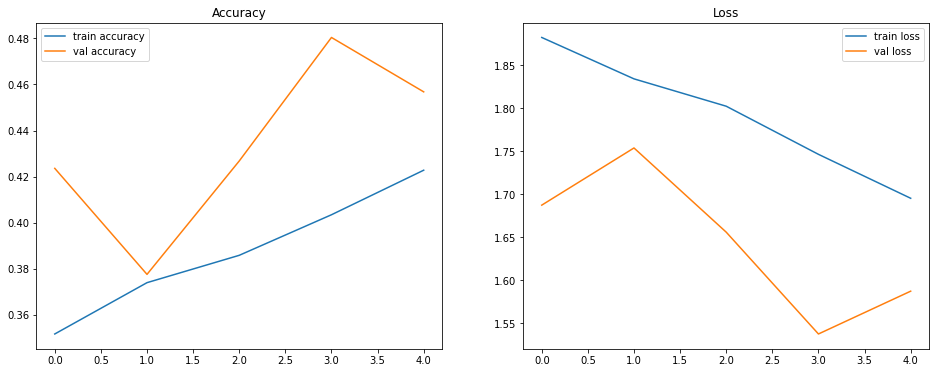

In [29]:
plot_loss_curves(model_3_history)

Sau khi train thêm, mô hình có vẻ bị `overfitting` trở lại.😟

## 7. Lặp lại quá trình để mô hình tốt hơn

Chúng ta có thể tiếp tục làm điều này. Việc tái cấu trúc lại kiến trúc của mô hình, thay đổi số layer, các units trong layers, thay đổi learning_rate, train mô hình lâu hơn thậm chí tìm phương thức khác để xử lý dữ liệu trước khi đưa vào mô hình ngoài data augmentation. 

Một điều thú vị mà chúng ta chưa đề cập đến đó là **transfer learning**. Tuy nhiên, chủ đề này sẽ là phần sau, và nó có rất nhiều điều thú vị trong đó. Trước khi kết thúc module này, chúng ta sẽ sử dụng mô hình được train ở trên để dự đoán hình xem hình ảnh đó là gì.

## 8. Dự đoán hình ảnh

mô hình hiện tại đã học được các label :

In [30]:
class_names

['prime_rib',
 'greek_salad',
 'spaghetti_bolognese',
 'filet_mignon',
 'panna_cotta',
 'bruschetta',
 'garlic_bread',
 'pulled_pork_sandwich',
 'clam_chowder',
 'pad_thai']

Tải xuông tập hình ảnh được lấy từ Google, mỗi hình ảnh đại diện cho 1 class trên : 

In [31]:
!wget https://www.dropbox.com/s/eqmanc3f6zwwzpq/multi_class_test.zip

--2021-09-07 16:35:18--  https://www.dropbox.com/s/eqmanc3f6zwwzpq/multi_class_test.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eqmanc3f6zwwzpq/multi_class_test.zip [following]
--2021-09-07 16:35:19--  https://www.dropbox.com/s/raw/eqmanc3f6zwwzpq/multi_class_test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8be50519ff4ba37a36cbf5cfc.dl.dropboxusercontent.com/cd/0/inline/BVs3OV3X4Yk6V5AWGqFOIqurojgtfINMj_f0bTt50Hy014H3yjjCM4G0IVwafKJa547QIic-OWWcwjmGoVql7IeZ-b4gE7gCkcYjoRWhMtnMCsD7-l3w_UwxeMoTgyrBtbd9ZtvhrvWMFIr9e8ObWqyM/file# [following]
--2021-09-07 16:35:19--  https://uce8be50519ff4ba37a36cbf5cfc.dl.dropboxusercontent.com/cd/0/inline/BVs3OV3X4Yk6V5AWGqFOIqurojgtfINMj_f0bTt50Hy014H3yjjCM4G0IVwafKJa54

In [32]:
unzip_file("multi_class_test.zip")

Unziped file


In [33]:
walk_through_directory("multi_class_test")

Có 0 thư mục con và 10 files trong thư mục multi_class_test


In [34]:
os.listdir("multi_class_test")

['prime_rib.jpg',
 'bruschetta.jpg',
 'garlic_bread.jpeg',
 'filet_mignon.jpg',
 'panna_cotta.jpg',
 'clam_chowder.jpg',
 'pulled_pork_sandwich.jpeg',
 'greek_salad.jpg',
 'pad_thai.jpg',
 'spaghetti_bolognese.jpeg']

Vì đây là những hình ảnh được tải xuống chưa qua quá trình xử lý cũng như đồng bộ dữ liệu theo định dạng mà mô hình đã train trước đó nên chúng ta chưa thể đưa dữ liệu vào mô hình để train được. Trước hết, chúng ta sẽ tạo hàm để load hình và đồng bộ dữ liệu theo đúng định dạng

In [35]:
def load_and_prep_image(filepath, shape=(224,224)) : 
  # load hình ảnh 
  image = tf.io.read_file(filepath)
  # decode hình ảnh thành các giá trị dưới dạng ma trận 
  image = tf.image.decode_image(image, channels=3)
  # thay đổi kích thước hình
  image = tf.image.resize(image, size=shape)
  # trả về giá trị được chuẩn hóa
  return image/255.


Ví dụ lấy thử một hình để test hàm trên : 

In [36]:
load_and_prep_image("/content/multi_class_test/clam_chowder.jpg")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7390756 , 0.73515403, 0.71946776],
        [0.7211435 , 0.7172219 , 0.70153564],
        [0.70350146, 0.6995799 , 0.6838936 ],
        ...,
        [0.9298417 , 0.92199856, 0.9259201 ],
        [0.9179833 , 0.91014016, 0.9140617 ],
        [0.93235266, 0.9245095 , 0.9284311 ]],

       [[0.7315076 , 0.72758603, 0.71189976],
        [0.69888955, 0.694968  , 0.6792817 ],
        [0.6746499 , 0.6707283 , 0.65504205],
        ...,
        [0.92120355, 0.9133604 , 0.917282  ],
        [0.9250395 , 0.9171964 , 0.92111796],
        [0.9325428 , 0.92469966, 0.92862123]],

       [[0.7305322 , 0.72661066, 0.7109244 ],
        [0.6979842 , 0.69406265, 0.6783764 ],
        [0.6670868 , 0.6631652 , 0.64747894],
        ...,
        [0.92857146, 0.9207283 , 0.9246499 ],
        [0.92655534, 0.9187122 , 0.92263377],
        [0.9453779 , 0.93753475, 0.9414563 ]],

       ...,

       [[0.86196977, 0.8580482 , 0.8423619 ],
        [0.85

Ok, hàm chuẩn  bị dữ liệu đã sẵn sàng, chúng ta sẽ tạo một vòng lặp để load và đồng bộ đinh dạng hình ảnh trong folder "multi_class_test" và đưa vào mô hình dự đoán, nhưng như phần trước, mô hình sẽ nhận một dữ liệu 4 chiều `(batch_size, width, height, color channel)`, trong khi hình ảnh trong dữ liệu chỉ có 3. Do đó, cần phải thêm 1 chiều đầu tiên cho hình ảnh trước khi đưa vào mô hình dự đoán.

In [37]:
import pandas as pd

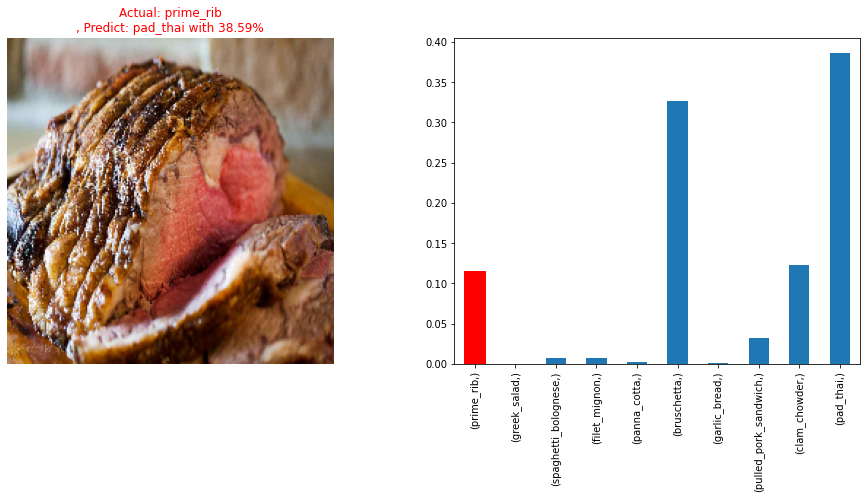

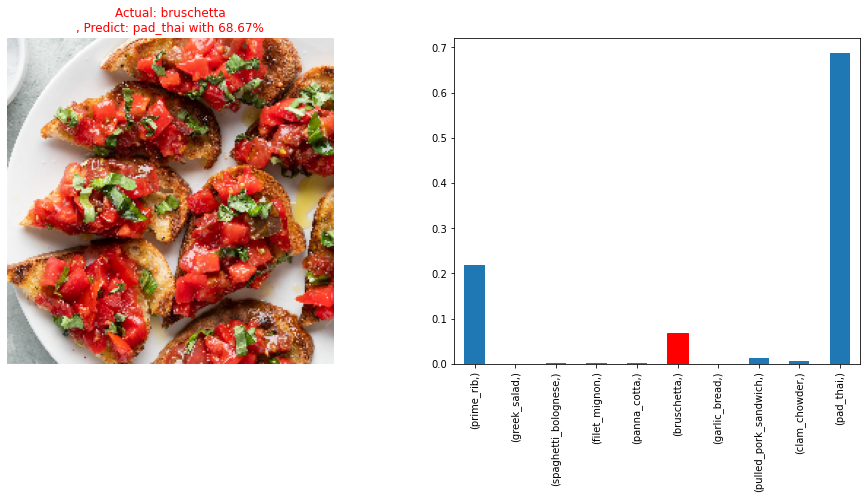

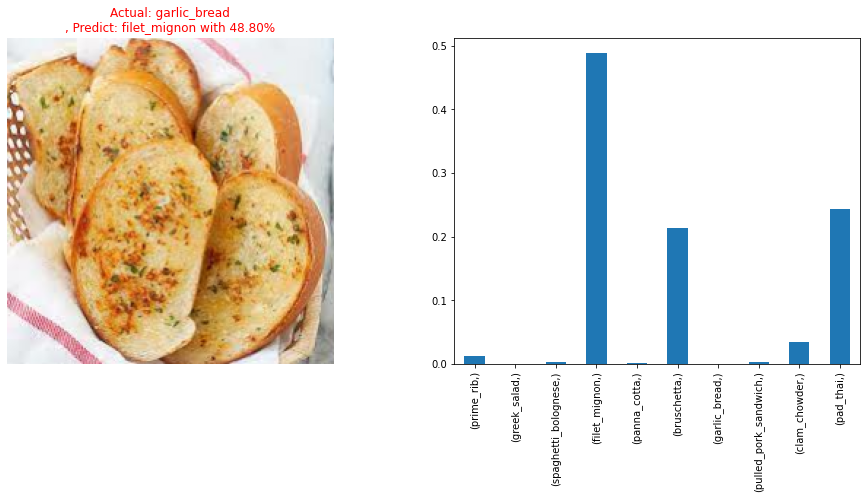

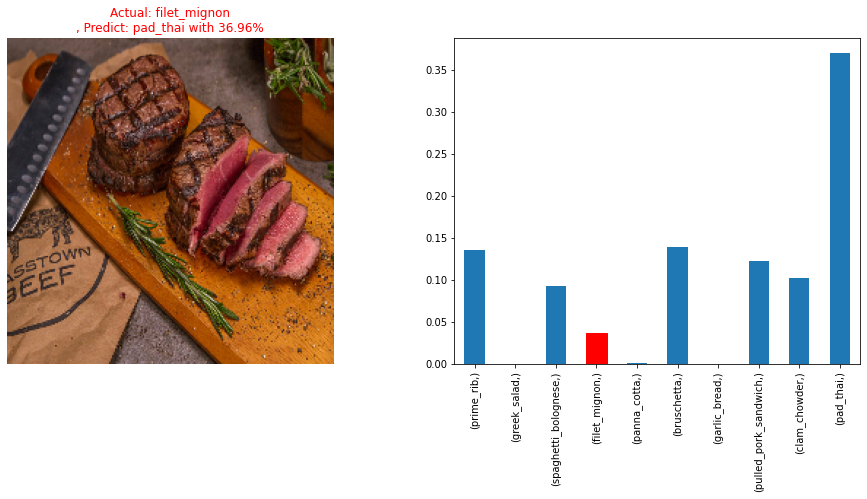

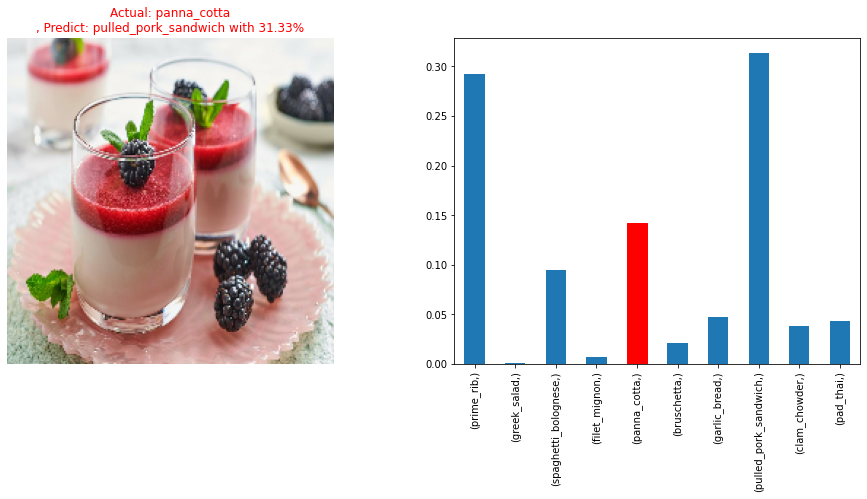

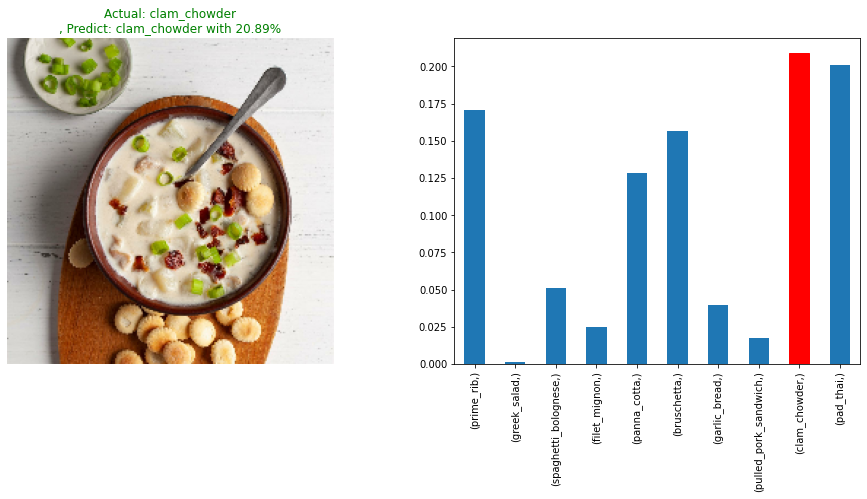

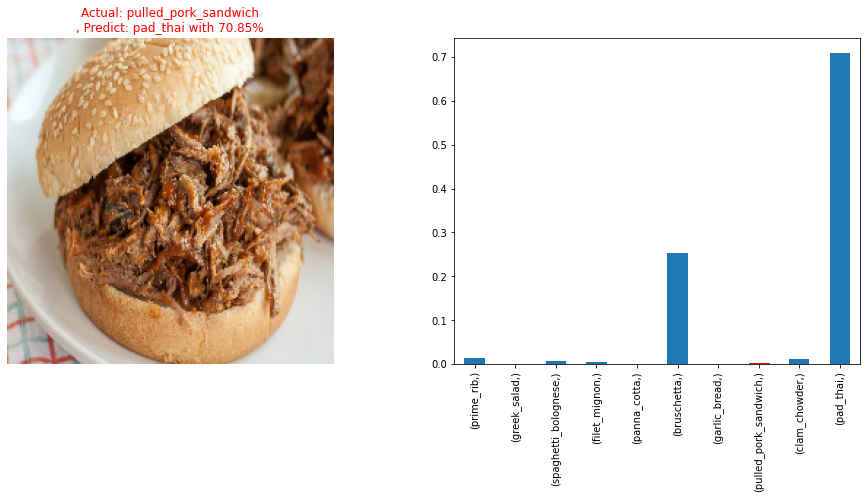

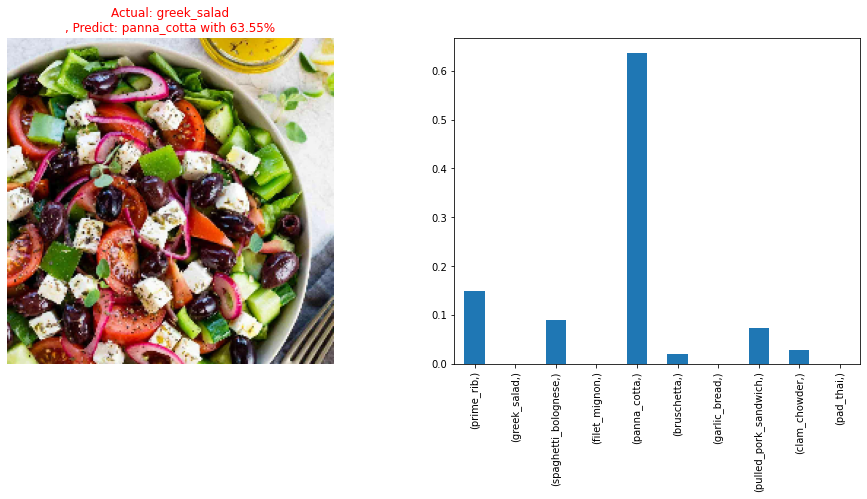

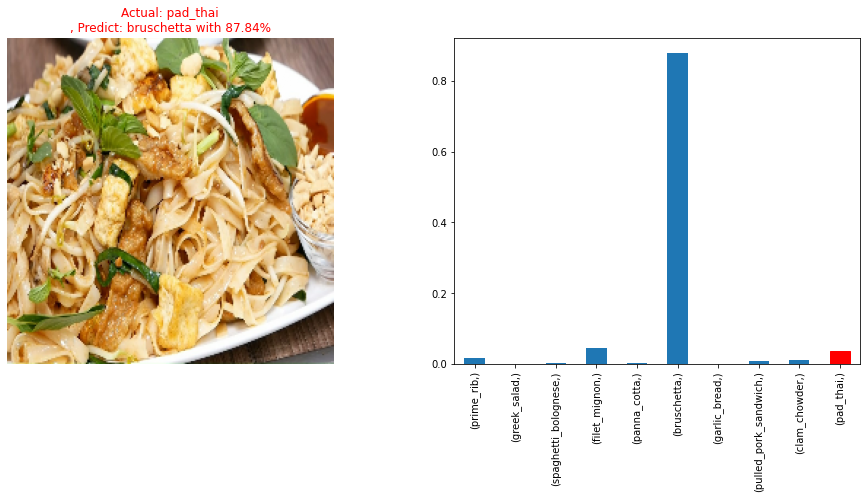

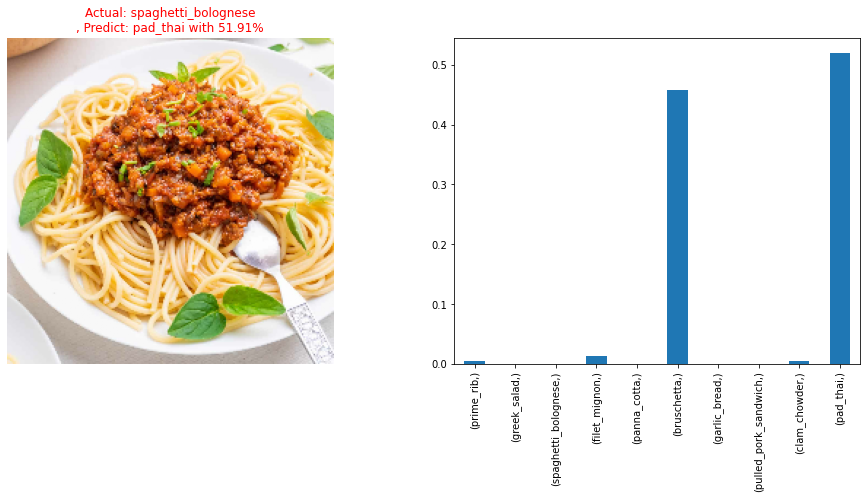

In [39]:
predicted_images_path = [os.path.join("multi_class_test", image_name) for image_name in os.listdir("multi_class_test")]

for index, image_path in enumerate(predicted_images_path) :   
  image = load_and_prep_image(image_path)
  actual_label = image_path.split("/")[-1].split(".")[0]
  label_index = 0
  for i, class_name in enumerate(class_names) : 
    if actual_label.strip().lower() == class_name.strip().lower() : 
      label_index = i
  pred_probs = model_3.predict(tf.expand_dims(image, axis=0))
  max_index = tf.argmax(tf.squeeze(pred_probs))
  pred_label = class_names[max_index]
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
  ax1.imshow(image)
  ax1.axis(False)
  if actual_label.strip().lower() ==  pred_label.strip().lower() :
    color = "green"
  else : 
    color = "red"
  ax1.set_title(f"Actual: {actual_label}\n, Predict: {pred_label} with {pred_probs[0][max_index]*100:.2f}%", color=color)  
  pd.DataFrame(tf.squeeze(pred_probs), index=[class_names]).plot.bar(ax=ax2, legend=None)
  ax2.get_children()[label_index].set_color("red")
  plt.show()